# Load needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from alibi.explainers import ALE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier 
#import os
#os.add_dll_directory(r"C:\Windows\System32")
from alibi.explainers import ALE, plot_ale
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import random
%matplotlib inline
from sklearn.ensemble import VotingClassifier

# Load needed classifiers

In [2]:
### Define selected models
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier()
# Logistic Regression
logreg_clf = LogisticRegression(multi_class='multinomial',solver="lbfgs")
# SVC Model
svc_clf = SVC(probability=True) 
# LinearSVC Model
#linsvc_clf = LinearSVC(probability=True)
# Random Forest Model
rf_clf = RandomForestClassifier()
# GaussianNB Model
gnb_clf = GaussianNB()
# DecisionTree Model
dt_clf = DecisionTreeClassifier()
# XGBoost Model
xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
#Nsvc_clf = NuSVC(probability=True)
AdaBoost_clf = AdaBoostClassifier()
gradientB_clf = GradientBoostingClassifier()
linearD_clf = LinearDiscriminantAnalysis()
quadraticDA_clf = QuadraticDiscriminantAnalysis()
baggingC_clf = BaggingClassifier() 
extraTree_clf = ExtraTreesClassifier()

# Define ensemble learning model

In [5]:
# Involve machine learning algorithms for the ensemble
model_fit_algorithm = {
    'SVC': svc_clf,
    'RFM': rf_clf,
    'GaussianNB': gnb_clf,
    'DTM': dt_clf,
    'XGBoost': xg_clf,
    'LogiReg': logreg_clf,
    'KNN': knn,
    'decisionTree': dt_clf,
    'AdaBoost': AdaBoost_clf,
    'gradientB': gradientB_clf,
    'linearD': linearD_clf,
    'quadraticDA': quadraticDA_clf,
    'baggingC': baggingC_clf,
    'extraTree': extraTree_clf,
    'gradientBoosting': gradientB_clf
}

In [6]:
ensemble_model = VotingClassifier(estimators=list(model_fit_algorithm.items()), voting='soft')

# Load needed dataset

In [7]:
### Read the table
U2_New_Combine_Data_Selected = pd.read_csv('Data/U2_Combine_Data_Selected.csv')
U2_New_Combine_Data_Selected.columns

Index(['FirstLayer_dialogue_speed_factor_7', 'FirstLayer_arg_freq_factor_3',
       'FirstLayer_hotkey_freq_factor_3', 'FirstLayer_arg_speed_factor_2',
       'FirstLayer_arg_share_factor_2', 'ThirdLayer_Inter_factor_2',
       'findTeamAveScore', 'SecondLayer_tool_Inter_factor_1',
       'FirstLayer_dialogue_speed_factor_4', 'FirstLayer_arg_speed_factor_4',
       'FirstLayer_hotkey_freq_factor_1', 'FirstLayer_task_speed_factor_2',
       'ThirdLayer_Inter_factor_7', 'SecondLayer_item_Inter_factor_4',
       'FirstLayer_hotkey_share_factor_2', 'FirstLayer_dialogue_freq_factor_5',
       'FirstLayer_dialogue_share_factor_3',
       'SecondLayer_dialogue_Inter_factor_1', 'FirstLayer_arg_freq_factor_1',
       'SecondLayer_dialogue_Inter_factor_3',
       'SecondLayer_hotkey_Inter_factor_1', 'FirstLayer_arg_speed_factor_3',
       'FirstLayer_tool_freq_factor_1', 'FirstLayer_dialogue_freq_factor_4',
       'FirstLayer_hotkey_freq_factor_2', 'FirstLayer_dialogue_freq_factor_2',
       'bi

In [8]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in U2_New_Combine_Data_Selected.columns:
    U2_New_Combine_Data_Selected[col] = encoder.fit_transform(U2_New_Combine_Data_Selected[col])

y_label = U2_New_Combine_Data_Selected['U2PostScoreLevel']
X_features = U2_New_Combine_Data_Selected.drop(['playerName','U2PostScoreLevel'],axis=1)

In [9]:
feature_names = list(X_features.columns)

In [10]:
X_features_stdPre = StandardScaler().fit_transform(X_features)
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X_features_stdPre, y_label, test_size=0.2, stratify=y_label, random_state=random_state)

In [11]:
ensemble_model.fit(X_features_stdPre, y_label)

C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('SVC', SVC(probability=True)),
                             ('RFM', RandomForestClassifier()),
                             ('GaussianNB', GaussianNB()),
                             ('DTM', DecisionTreeClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fal...
                             ('KNN', KNeighborsClassifier()),
                             ('decisionTree', DecisionTreeClassifier()),
                             ('AdaBoost', AdaBoostClassifier()),
                             ('gradientB', GradientBoostingClassifier()),
                             ('linearD', LinearDiscriminantAnalysis()),
                             ('quadraticDA', QuadraticDiscriminantAnalysis()),
                             ('baggingC', BaggingClassifier()),
                             ('extraTree', ExtraTreesClassifier()),
                             ('gradientBoosting',
                              GradientBoostingClassifier())],
                 voting='soft')

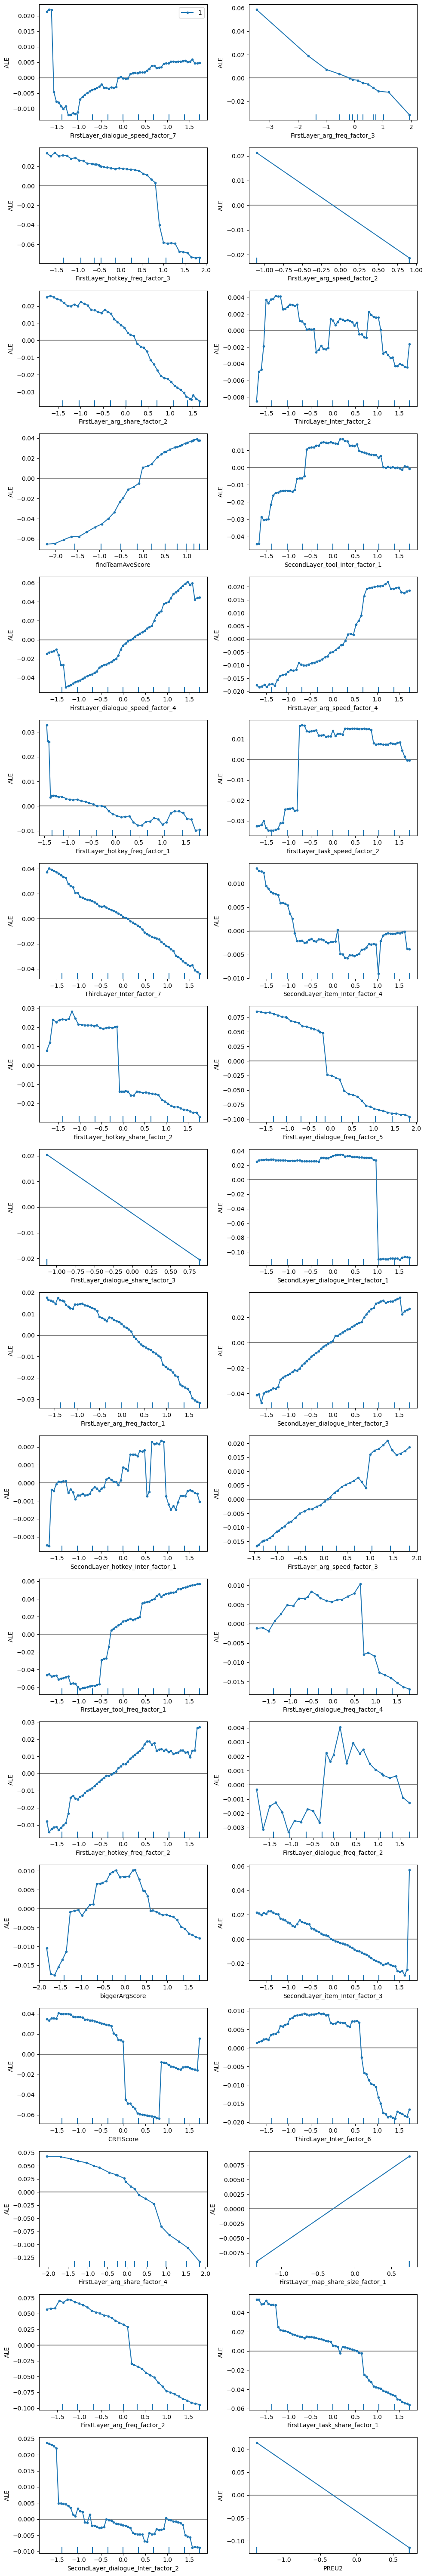

In [14]:
ale_explainer = ALE(ensemble_model.predict_proba, feature_names=feature_names, target_names=[1])
ale_result = ale_explainer.explain(X_features_stdPre)
plot_ale(ale_result, n_cols=2, fig_kw={'figwidth':10,'figheight':60}, sharey=None)
plt.show()